<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study-3:-Introduction-to-Classification" data-toc-modified-id="Case-Study-3:-Introduction-to-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study 3: Introduction to Classification</a></span><ul class="toc-item"><li><span><a href="#Introduction-to-kNN-Classification" data-toc-modified-id="Introduction-to-kNN-Classification-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction to kNN Classification</a></span></li><li><span><a href="#Finding-the-Distance-Between-Two-Points" data-toc-modified-id="Finding-the-Distance-Between-Two-Points-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Finding the Distance Between Two Points</a></span></li><li><span><a href="#Majority-Vote" data-toc-modified-id="Majority-Vote-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Majority Vote</a></span></li><li><span><a href="#Finding-Nearest-Neighbors" data-toc-modified-id="Finding-Nearest-Neighbors-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Finding Nearest Neighbors</a></span></li><li><span><a href="#Generating-Synthetic-Data" data-toc-modified-id="Generating-Synthetic-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Generating Synthetic Data</a></span></li><li><span><a href="#Making-a-Prediction-Grid" data-toc-modified-id="Making-a-Prediction-Grid-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Making a Prediction Grid</a></span><ul class="toc-item"><li><span><a href="#Meshgrid" data-toc-modified-id="Meshgrid-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Meshgrid</a></span></li><li><span><a href="#Enumerate" data-toc-modified-id="Enumerate-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Enumerate</a></span></li></ul></li><li><span><a href="#Plotting-the-Prediction-Grid" data-toc-modified-id="Plotting-the-Prediction-Grid-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Plotting the Prediction Grid</a></span></li><li><span><a href="#Applying-the-kNN-Method" data-toc-modified-id="Applying-the-kNN-Method-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Applying the kNN Method</a></span></li></ul></li></ul></div>

## Case Study 3: Introduction to Classification

### Introduction to kNN Classification

Statistical learning refers to a collection of mathematical and computation tools to understand data.

supervised learning, the goal is to estimate or predict an output based on one or more inputs.

The inputs have many names, like predictors, independent variables, features, and variables being called common.

The output or outputs are often called response variables, or dependent variables.

Broadly two types of problems:

1. Regression Problems - If the response is quantitative -- say, a number that measures weight or height
1. Classification Problems - If the response is qualitative -- say, yes or no, or blue or green


This case study deals with one specific approach to classification.

The goal is to set up a classifier such that when it's presented with a new observation whose category is not known, it will attempt to assign that observation to a category, or a class, based on the observations for which it does know the true category.

This specific method is known as the k-Nearest Neighbors classifier (kNN classification)

Given a positive integer k, say 5, and a new data point, it first identifies those k points in the data that are nearest to the point and classifies the new data point as belonging to the most common class 1 among those k neighbors.

How does the k-Nearest Neighbors classifier classify observations?

a) According to the most common class among the nearest  k  neighbors

b) According to the mean class among the nearest  k  neighbors

Ans -> a

### Finding the Distance Between Two Points

We consider Euclidean Distance here.

Since we're dealing with vectors, we'll be using NumPy for this.

From a mathematical perspective, it will be nicer to use column vectors but we'll be using row vectors, because they're easier to deal with in NumPy.

In [800]:
import numpy as np

p1 = np.array([1,1])
p2 = np.array([4,4])

In [801]:
p2 - p1

array([3, 3])

In [802]:
np.power(p2-p1, 2)

array([9, 9], dtype=int32)

In [803]:
np.sqrt(np.sum(np.power(p2-p1, 2)))

4.242640687119285

In [804]:
import numpy as np

def distance(p1, p2):
    """
    Find the distance between point p1 and p2
    """
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])

distance(p1,p2)

4.242640687119285

### Majority Vote

For building our KNN classifier, we need to be able to compute, what is sometimes called, majority vote.

This means that given an array or a sequence of votes, which could be say numbers 1, 2, and 3, we need to determine how many times each occurs, and then find the most common element.

Note that while we need to count the number of times each vote occurs in the sequence, we will not be returning the counts themselves, but instead the observation corresponding to the highest count.



In [805]:
def majority_vote(votes):
    """
    xxx
    """

    vote_counts = {}
    for vote in votes:
        vote_counts[vote] = vote_counts.get(vote, 0) + 1
    
    return vote_counts

votes = [1,2,3,1,2,3,1,2,3,3,3,3]

vote_counts = majority_vote(votes)
print(vote_counts)

{1: 3, 2: 3, 3: 6}


Let's first take our vote counts dictionary.

We can ask, what is the maximum.

In this case, the answer is 3.

Note that running that is the exact same as running max of vote counts dot keys.

This returns us the maximum key.

If you wanted to find out the maximum of the values, you would replace dot keys with dot values and we would know that the maximum vote occurs six times.



In [806]:
max(vote_counts)

3

In [807]:
max(vote_counts.keys())

3

In [808]:
max_count = max(vote_counts.values())

print(max_count)

6


We can now loop over all entries in the dictionary and find which entry, or entries in case there are many, corresponds to the maximum count.

We can do this using the items method of dictionaries.



In [809]:
for vote, count in vote_counts.items():
    print(vote, count)

1 3
2 3
3 6


In [810]:
winners = []
max_count = max(vote_counts.values())
for vote, count in vote_counts.items():
    if count == max_count:
        winners.append(vote) 

print(winners)

[3]


In case of a tie, we can just pick one of the winners at random since any option is just as good as any other.

In [811]:
import random

def majority_vote(votes):
    """
    Return the most common element in votes
    """

    vote_counts = {}
    for vote in votes:
        vote_counts[vote] = vote_counts.get(vote, 0) + 1

    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    
    return random.choice(winners)


votes = [1,2,3,1,2,3,1,2,3,3,3,3]
winner = majority_vote(votes)
print(winner)

3


In [812]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
print(winner)

3


The most commonly occurring element in a sequence is called mode in statistics.

Finding a mode is a common statistical operation.



In [813]:
import scipy.stats as ss

def majority_vote_short(votes):
    """
    Return the most common element in votes
    """
    mode, count = ss.mstats.mode(votes)
    return mode

In [814]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
print(winner)

2


In [815]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
print(winner)

3


In [816]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
print(winner)

2


In [817]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
print(winner)

2


In [818]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
print(winner)

2


In [819]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
print(winner)

2


In [820]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
print(winner)

3


In [821]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
print(winner)

2


The function majority vote short, is both short and fast but if you run the code several times, you'll see that it always returns number 2.

If there is more than one such value, only the smallest is returned. The bin-count for the modal bins is also returned.

But in this case we will stick to our function, majority vote.

That's because when two or more elements are tied, we'd like to pick one of them at random.

### Finding Nearest Neighbors

we need to find which point are the nearest neighbors of any given point that we're hoping to classify.



In [822]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5,2])

print(points)
print(p)

[[1 1]
 [1 2]
 [1 3]
 [2 1]
 [2 2]
 [2 3]
 [3 1]
 [3 2]
 [3 3]]
[2.5 2. ]


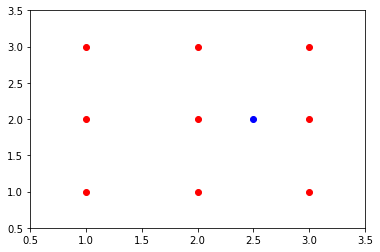

In [823]:
import matplotlib.pyplot as plt

plt.plot(points[:,0], points[:,1], "ro");
plt.plot(p[0], p[1], "bo");
plt.axis([0.5, 3.5, 0.5, 3.5]);

In [824]:
distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p, points[i])

print(distances)

[1.80277564 1.5        1.80277564 1.11803399 0.5        1.11803399
 1.11803399 0.5        1.11803399]


We could sort the distances array to give us shorter distances, but instead what we really would like to get is an index vector that would sort the array.

If we had that, we could take the first K elements of that array, and know that the corresponding points are the K closest points to our point of interest p.

Fortunately, this function exists in NumPy and it's called argsort.



In [825]:
print(distances)


[1.80277564 1.5        1.80277564 1.11803399 0.5        1.11803399
 1.11803399 0.5        1.11803399]


In [826]:
ind = np.argsort(distances)
print(ind)

[4 7 3 5 6 8 1 0 2]


If we now type distances, and we extract the element at locations given by ind, we'll see that the distances have been sorted.

In [827]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

If we wanted to take the say, two nearest elements, we would just pick the first two indices of the end vector.

So we would type from 0 to 2, which gives us the elements at locations 0 and 1.

In [828]:
distances[ind[0:2]]

array([0.5, 0.5])

In [829]:
def find_nearest_neighbors(p, points, k=5):
    """
    Find the k nearest neighbors of point p and return their indices
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

ind = find_nearest_neighbors(p, points, 2)
print(points[ind])

[[2 2]
 [3 2]]


In [830]:
ind = find_nearest_neighbors(p, points, 3)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [831]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [832]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

knn_predict(np.array([2.5,2.7]), points, outcomes, k=2)

1

In [833]:
knn_predict(np.array([1.0,2.7]), points, outcomes, k=2)

0

What does np.argsort do?

a) It sorts an array, provided its elements are arguments.

b) It sorts an array according to a single argument and returns a sorted list.

c) It sorts an array according to a single argument and returns the sorted indices.

d) It will try to sort a list, and if it can't, it will argue with you.

Ans -> c

### Generating Synthetic Data

We're going to write a function that generates two end data points, where the first end points are from class 0, and the second end points are from class 1.

These data are known as synthetic data because we will be generating these data with the help of the computer.

In this case, we'll generate predictors from two bivariate normal distributions, where the first distribution gives rise to observations belonging to class 0, and the second gives rise to observations belonging to class 1.

The word, bivariate, just means 2 variables, like x and y.

If it were generating say, just the x variables, then we'd be dealing with univariate data.

To generate the synthetic data, we'll be using this ipstats module.

First, we specify the mean and standard deviation for observations coming from class 1.

We can just try this out.

We'd like to generate in this example, 5 rows and 2 columns of observations coming from this particular normal distribution.

In [834]:
import scipy.stats as ss

ss.norm(0,1).rvs((5,2))

array([[0.90942757, 0.47660079],
       [2.22323137, 0.54289302],
       [1.00972356, 0.614883  ],
       [0.16786976, 2.34752126],
       [0.88955919, 0.26843154]])

In [835]:
ss.norm(1,1).rvs((5,2))

array([[ 1.79384036,  2.12553891],
       [ 0.51746259, -1.25912685],
       [ 2.02840888,  0.30273866],
       [-0.12907455,  1.95414597],
       [-1.19818729,  1.31238267]])

The next step for us is to concatenate these two arrays so that we get a single array consisting of 10 rows and 2 columns.

We'll be doing that using the numPy concatenate function.

In [836]:
n = 5
np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)

array([[ 0.75372694,  0.7696115 ],
       [ 1.56883929, -0.25011752],
       [ 2.11533449,  0.47962325],
       [-0.59239704, -0.89674993],
       [ 1.27863277, -0.54960068],
       [ 1.62193445, -0.86792072],
       [ 1.22987129,  1.62572212],
       [ 1.67848754,  2.39068656],
       [-0.25123615,  0.0437703 ],
       [ 1.00734687,  0.70946478]])

Remember, the first n observations have outcome equal to 0, which is the class label.

The second group of observations have class label or outcome equal to 1.

Let's generate the outcome vector.

In [837]:
n = 5
np.concatenate((np.repeat(0,n), np.repeat(1,n)))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

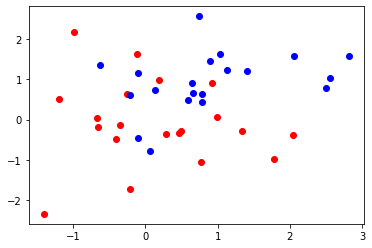

In [838]:
def generate_synth_data(n=50):
    """ Create two sets of points from bivariate normal distributions"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))

    return (points, outcomes)

n = 20 
points, outcomes = generate_synth_data(n)

plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro");
plt.plot(points[n:,0], points[n:,1], "bo");
plt.savefig("bivardata.pdf")

### Making a Prediction Grid

Our next task is to plot a prediction grid.

This means that once we've observed our data, we can examine some part of the predictor space and compute the class prediction for each point in the grid using the knn classifier.

So instead of finding out how our classifier might classify a given point, we can ask how it classifies all points that belong to a rectangular region of the predictor space.

In [839]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """ Classify each point on the prediction grid """
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)

    prediction_grid = np.zeros(xx.shape, dtype=int)

    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)

    return (xx, yy, prediction_grid)

#### Meshgrid

Meshgrid takes in two or more coordinate vectors, say one vector containing the x values of interest and the other containing the y values of interest.

It returns matrices, the first containing the x values for each grid point and the second containing the y values for each grid point.



#### Enumerate

Enumerate is useful when dealing with sequences and when we'd like to have access simultaneously to two things-- different elements in the sequence as well as their index values.

Enumerate returns to us a sequence of tuples.

Inside every tuple, the first object is going to be in the index that corresponds to a specific object.

The second item is the object itself.

In [840]:
seasons = ["spring", "summer", "fall", "winter"]

list(enumerate(seasons))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

In [841]:
for ind, season in enumerate(seasons):
    print(ind, season)

0 spring
1 summer
2 fall
3 winter


What does np.arange do?

a) Takes a tuple of np.arrays as the first argument and arranges them according to the second argument

b) Creates regularly spaced values between the first and second argument, with spacing given in the third argument

c) Takes a range object and returns an np.array range object

Ans -> b

What does enumerate do?

a) Takes an iterable and returns a range object

b) Takes an iterable and returns a new iterable with tuples as elements, where the first index of each tuple is the index of the tuple in the iterable

c) Takes iterables as arguments and returns an array of the total number of elements in each iterable

d) Takes iterables as arguments and returns an integer of the total number of elements in all iterables

Ans -> b

### Plotting the Prediction Grid

We can now try out different values for k.

If you use a small value you'll see that the boundary between the colors, the so-called decision boundary, is more smooth the larger the value of k.

This means that k controls the smoothness of the fit.

In [842]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [843]:
predictors, outcomes = generate_synth_data()

In [844]:
predictors.shape

(100, 2)

In [845]:
outcomes.shape

(100,)

<ipython-input-842-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


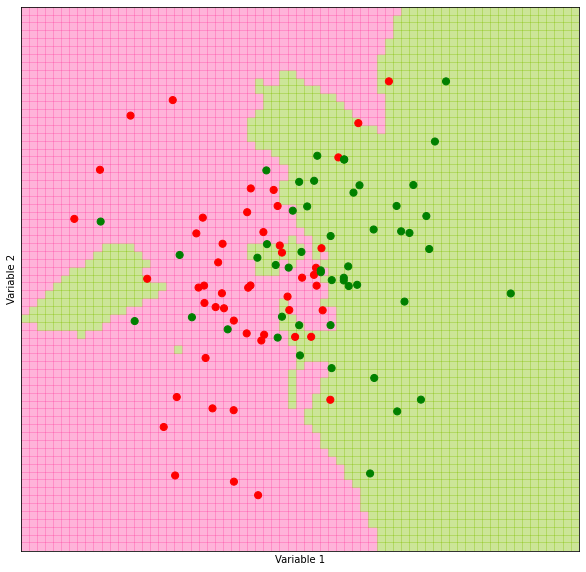

In [846]:
paredictors, outcomes = generate_synth_data()

k = 5
filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4)
h = 0.1

xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)

plot_prediction_grid(xx,yy,prediction_grid,filename)

<ipython-input-842-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


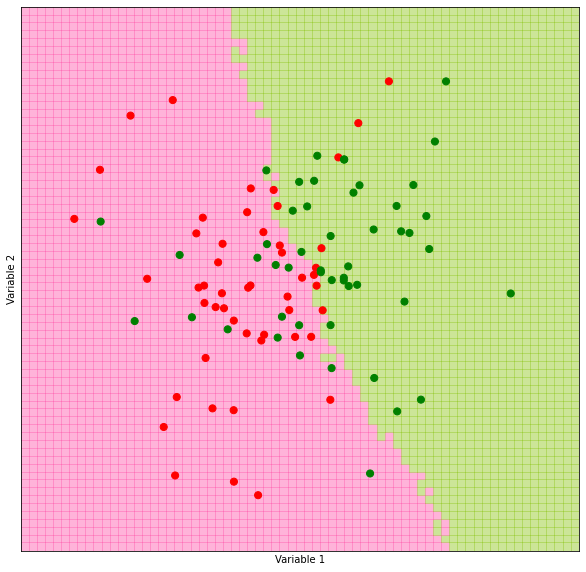

In [847]:
k = 50
filename = "knn_synth_50.pdf"
limits = (-3,4,-3,4)
h = 0.1

xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)

plot_prediction_grid(xx,yy,prediction_grid,filename)

Looking at the plot here for k equals 50, we can see that the decision boundary is pretty smooth.

In contrast, if you look at the plot on the right, where k is equal to 5, you'll see that the shape of the decision boundary is more complicated.

It seems that you might be able to find a value of k that maximizes the accuracy of the predictions.

But that's somewhat short sighted.

This is because what you really care about is not how well your method performs on the training data set, the data set we've used so far.

But rather how well it performs on a future dataset you haven't yet seen.

It turns out that using a value for k that's too large or too small is not optimal.

A phenomenon that is known as the bias-variance tradeoff.

This suggests that some intermediate values of k might be best.

We will not talk more about it here, but for this application, using k equal to 5 is a reasonable choice.

### Applying the kNN Method

SciKitLearn is an open source machine learning library for Python.

It's a very extensive library.

Here, we will only make use of its knn classifier.

But there is much, much more there to explore.

We'll be applying both the SciKitLearn and our homemade classifier to a classic data set created by Ron Fisher in 1933.

It consists of 150 different iris flowers.

50 from each of three different species.

For each flower, we have the following covariates: sepal length, sepal width, petal length, and petal width.

In [848]:
from sklearn import datasets

iris = datasets.load_iris()

In [849]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

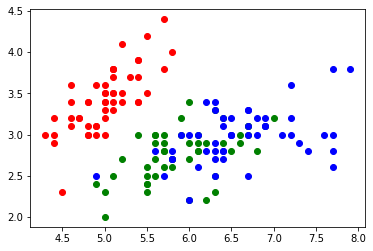

In [850]:
predictors = iris.data[:, 0:2]
outcomes = iris.target
# print(outcomes)

plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro");
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go");
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo");
plt.savefig("iris.pdf")

<ipython-input-842-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


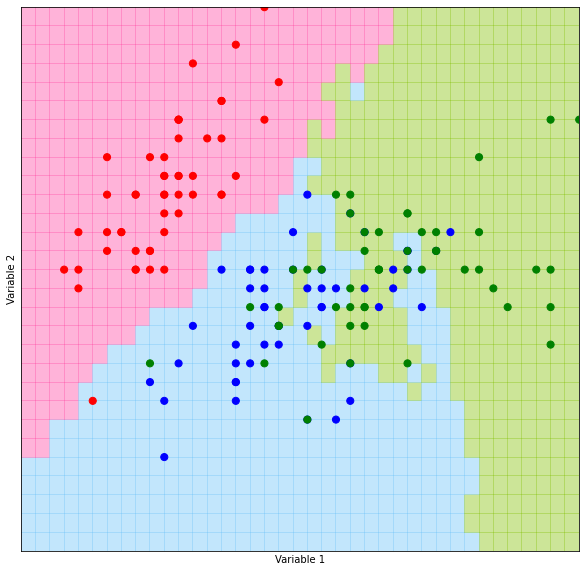

In [851]:
k = 5
filename = "iris_grid.pdf"
limits = (4,8,1.5,4.5)
h = 0.1

xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)

plot_prediction_grid(xx,yy,prediction_grid,filename)

Let's then fit the knn classifier using both the algorithm from SciKitLearn as well as our own homemade algorithm.

We'll be importing the Kneighbors classifier from the sklearn neighbors module.

In [852]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [853]:
sk_predictions.shape

(150,)

In [854]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [855]:
my_predictions.shape

(150,)

What we would like to do is compare the predictions obtained by the SciKit library to our own homemade predictions.

To do this, we can ask how often do the sk_predictions predictions agree with my predictions.

In [856]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

We can take the mean of this in which case true will be valued as one and false will be evaluated as zero.

In [857]:
np.mean(sk_predictions == my_predictions)

0.96

And we can multiply this by 100 to get the percentages.

In [858]:
print(100*np.mean(sk_predictions == my_predictions))

96.0


We can also ask how frequently do my predictions and SciKit predictions agree with the actual observed outcomes.

In [859]:
print(100*np.mean(sk_predictions == outcomes))

83.33333333333334


In [860]:
print(100*np.mean(my_predictions == outcomes))

84.66666666666667


What we see is the following:

using SciKit, the actual observed outcomes for the data points that we have observed, agree with the predictions of the SciKit library 83% of the time.

In this case, our homemade predicter is actually somewhat better.

We're correct approximately 85% of the time.